In [1]:
# Importing Libraries and Packages
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

Data Preprocessing

In [2]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-white.csv')
df1 = df.dropna()
df2 = df1.values

In [3]:
# Separating Dataset into Features and Target Variables
# X: (First 11 Columns)
# y: (Column 12)
X = df2[:, :11]
y = df2[:, 11]


In [4]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)
print(x_train.shape)
print(x_test.shape)

(3918, 11)
(980, 11)


Training Multiple Linear Regression Model

In [5]:
#Finding RSS/TSS/R-Squared for Training Data 
# Fitting Data Into Regression Object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

# Predicting output based on fitted model
y_hat = regr.predict(x_train)

# Measuring Error
RSS = np.sum((y_hat-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS

print("RSS:",RSS)
print("TSS:",TSS)
print("R^2 = {0:f}".format(1-RSS/TSS))



RSS: 2175.3116897447862
TSS: 3023.3060234813684
R^2 = 0.280486


We modified the linear regression algorithm slightly by rounding the predictions to 
the nearest integer, ex. 2.6 -> 3 and 2.45 -> 2. 

In [6]:
#Instead using the method above where values were
#continuous, we decided to round our yhat values 
#accordingly 

#Train Set 
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_hat_round = np.around(regr.predict(x_train))


# Measuring Error
RSS = np.sum((y_hat_round-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print("R-square value (rounded):",Rsq)

acc_train_round = np.mean(y_hat_round == y_train)
print("Accuracy for training set (rounded):", acc_train_round)


R-square value (rounded): 0.16184468911881023
Accuracy for training set (rounded): 0.5137825421133231


In [7]:
#Test Data, Not Rounded 
y_hat_test = regr.predict(x_test)

RSS = np.sum((y_hat_test-y_test)**2)
TSS = np.sum((y_test-np.mean(y_test))**2)
Rsq = 1 - RSS/TSS

print("RSS:",RSS)
print("TSS:",TSS)
print("R^2 = {0:f}".format(1-RSS/TSS))


RSS: 586.2654996984949
TSS: 815.9704081632653
R^2 = 0.281511


In [8]:
#Test Data, Rounded 
y_hat_test_rounded = np.around(y_hat_test)

acc_train_round = np.mean(y_hat_test_rounded == y_test)
print("Accuracy:",acc_train_round)

Accuracy: 0.5173469387755102


Adding Regularization

Ridge Regression: Train Set
Alpha: 0 	 Accuracy(Train): 0.5137825421133231
Alpha: 0.001 	 Accuracy(Train): 0.5137825421133231
Alpha: 0.01 	 Accuracy(Train): 0.5137825421133231
Alpha: 0.1 	 Accuracy(Train): 0.5137825421133231
Alpha: 10 	 Accuracy(Train): 0.5142930066360388
Alpha: 100 	 Accuracy(Train): 0.5204185809086268
Alpha: 10000 	 Accuracy(Train): 0.4540581929555896
Alpha: 1000000 	 Accuracy(Train): 0.450229709035222


Ridge Regression: Test Set
Alpha: 0 	 Accuracy(Test): 0.5173469387755102
Alpha: 0.001 	 Accuracy(Test): 0.5173469387755102
Alpha: 0.01 	 Accuracy(Test): 0.5173469387755102
Alpha: 0.1 	 Accuracy(Test): 0.5173469387755102
Alpha: 10 	 Accuracy(Test): 0.5163265306122449
Alpha: 100 	 Accuracy(Test): 0.5204081632653061
Alpha: 10000 	 Accuracy(Test): 0.45
Alpha: 1000000 	 Accuracy(Test): 0.44285714285714284


Text(0, 0.5, 'Accuracy')

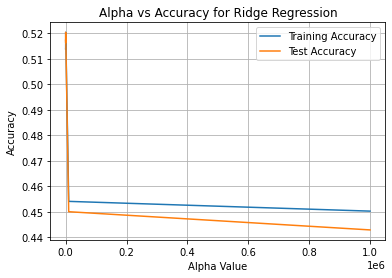

In [9]:
#Ridge Regression
alpha_vals = [0, 0.001, 0.01, 0.1, 10, 100, 10000, 1000000]

acc_train_ridgereg = []
acc_test_ridgereg = []

print("Ridge Regression: Train Set")
for alpha in alpha_vals: 
    regr_ridge = linear_model.Ridge(alpha)
    regr_ridge.fit(x_train, y_train)
    y_hat_ridge = regr_ridge.predict(x_train)
    y_hat_ridge_rounded = np.around(y_hat_ridge)
    acc_train_ridge = np.mean(y_hat_ridge_rounded == y_train)
    acc_train_ridgereg.append(acc_train_ridge)
    print("Alpha:",alpha,"\t","Accuracy(Train):",acc_train_ridge)

print('\n')

print("Ridge Regression: Test Set")
for alpha in alpha_vals: 
    regr_ridge = linear_model.Ridge(alpha)
    regr_ridge.fit(x_train, y_train)
    y_hat_ridge_test = regr_ridge.predict(x_test)
    y_hat_ridge_rounded_test = np.around(y_hat_ridge_test)
    acc_test_ridge = np.mean(y_hat_ridge_rounded_test == y_test)
    acc_test_ridgereg.append(acc_test_ridge)
    print("Alpha:",alpha,"\t","Accuracy(Test):",acc_test_ridge)


# Plot (Alpha Vs. Accuracy)
plt.plot(alpha_vals, acc_train_ridgereg, alpha_vals, acc_test_ridgereg)
plt.grid()
plt.xlabel('Alpha Value')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')
plt.title("Alpha vs Accuracy for Ridge Regression")
plt.ylabel("Accuracy")


In [10]:
#Lasso Regression
lasso_train = []
print("Lasso Regression, Train Set")
for alpha in alpha_vals: 
    regr_lasso = linear_model.Lasso(alpha)
    regr_lasso.fit(x_train, y_train)
    y_hat_lasso = regr_lasso.predict(x_train)
    y_hat_lasso_rounded = np.around(y_hat_lasso)
    acc_train_lasso = np.mean(y_hat_lasso_rounded == y_train)
    lasso_train.append(acc_train_lasso)
    print("Alpha:",alpha,"\t","Accuracy (Train):",acc_train_lasso)

print()

lasso_test = []
print("Lasso Regression, Test Set")
for alpha in alpha_vals:
    regr_lasso = linear_model.Lasso(alpha)
    regr_lasso.fit(x_train, y_train)
    y_hat_lasso_test = regr_lasso.predict(x_test)
    y_hat_lasso_rounded_test = np.around(y_hat_lasso_test)
    acc_lasso_test = np.mean(y_hat_lasso_rounded_test == y_test)
    lasso_test.append(acc_lasso_test)
    print("Alpha:",alpha,"\t","Accuracy(Test):",acc_lasso_test,";")



Lasso Regression, Train Set
Alpha: 0 	 Accuracy (Train): 0.5137825421133231
Alpha: 0.001 	 Accuracy (Train): 0.5137825421133231
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1087.655844872394, tolerance: 0.30233060234813747
  positive)
Alpha: 0.01 	 Accuracy (Train): 0.5227156712608474
Alpha: 0.1 	 Accuracy (Train): 0.48672792240939255
Alpha: 10 	 Accuracy (Train): 0.450229709035222
Alpha: 100 	 Accuracy (Train): 0.450229709035222
Alpha: 10000 	 Accu

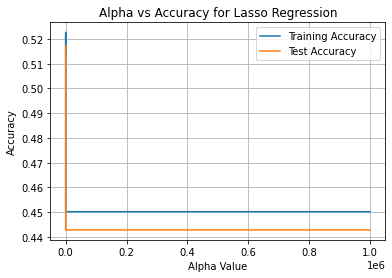

In [11]:
#Plotting the Test and Train accuracies for Lasso Regression
plt.plot(alpha_vals, lasso_train,'-')
plt.plot(alpha_vals, lasso_test,'-')
plt.grid()
plt.title("Alpha vs Accuracy for Lasso Regression")
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

We attempted feature transformation

In [12]:
#Polynomial Tranform 
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
regr_poly = linear_model.LinearRegression()
regr_poly.fit(x_train,y_train)
y_hat_train_poly = regr_poly.predict(x_train)

RSS = np.sum((y_hat_train_poly-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print(Rsq)
print(y_hat_train_poly)

y_hat_train_poly_round = np.around(y_hat_train_poly)
acc_train_poly = np.mean(y_hat_train_poly_round == y_train)
print(acc_train_poly)

0.28048577522433793
[5.93297248 6.32267974 6.1732877  ... 6.95897894 5.0486505  5.84436758]
0.5137825421133231


In [13]:
#Feature transform with a Bayesian Model + Ridge Regression
reg_bayesian = linear_model.BayesianRidge()
reg_bayesian.fit(x_train, y_train)
y_hat_bay = reg_bayesian.predict(x_train)
#print(y_hat_bay)

RSS = np.sum((y_hat_bay-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print("R^2:",Rsq)
print("RSS:",RSS)
print("TSS:",TSS)

y_hat_train_bay_round = np.around(y_hat_bay)
acc_train_bay = np.mean(y_hat_train_bay_round == y_train)
print("Accuracy for Bayesian Model (Train):",acc_train_bay)

R^2: 0.2803652013747745
RSS: 2175.676221390446
TSS: 3023.3060234813684
Accuracy for Bayesian Model (Train): 0.514037774374681


In [14]:
#Accuracy for Bayesian Model (Test)
y_hat_bay_test = reg_bayesian.predict(x_test)
y_hat_test_bay_round = np.around(y_hat_bay_test)
acc_test_bay = np.mean(y_hat_test_bay_round == y_test)
print("Accuracy for Bayesian Model (Test):",acc_test_bay)

Accuracy for Bayesian Model (Test): 0.5163265306122449
